# Face Recognition

In [3]:
import sys
import tensorflow as tf
import tensorflow.keras
import keras

print('These are the current versions working for me as of 2019-07-13')
print(f"TensorFlow Version: {tf.__version__}")
print(f"TensorFlow Keras Version: {tensorflow.keras.__version__}")
print(f"Keras Version: {keras.__version__}")
print()
print(f"Python {sys.version}")
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

These are the current versions working for me as of 2019-07-13
TensorFlow Version: 1.13.1
TensorFlow Keras Version: 2.2.4-tf
Keras Version: 2.2.4

Python 3.6.8 |Anaconda, Inc.| (default, Feb 21 2019, 18:30:04) [MSC v.1916 64 bit (AMD64)]
GPU is available


Face recognition is used for everything from automatically tagging pictures to unlocking cell phones. And with recent advancements in deep learning, the accuracy of face recognition has improved. In this course, learn how to develop a face recognition system that can detect faces in images, identify the faces, and even modify faces with "digital makeup" like you've experienced in popular mobile apps. Find out how to set up a development environment. Discover tools you can leverage for face recognition. See how a machine learning model can be trained to analyze images and identify facial landmarks. Learn the steps involved in coding facial feature detection, representing a face as a set of measurements, and encoding faces. Additionally, learn how to repurpose and adjust pre-existing systems.

## Face Recognition Pipeline Steps

1. Locate and extract faces from each image
2. Identify facial features in each image
3. Use position to align faces to match pose (standard) template
4. Use a neural network to create a set of measurements that represent that face
    - Encode faces using a trained neural network
    - Face encoding = measurements
5. Check Euclidean distance between face encodings (measurements)

### What is face detection

Face detection is the ability to detect and locate human faces in a photograph. Face detection is the first step in face recognition. Before we can identify a person's face, we need to be able to locate it in the photograph. If you've used a camera recently, you might have seen face detection in action. Face detection is a great feature for cameras. When the camera can automatically pick out faces in a picture, it can make sure that all the faces are in focus before it takes the picture. But we'll use face detection for a different purpose. 

We'll use it to extract each face from the photograph and pass it to the next step in our face recognition pipeline. The easiest way to locate objects in an image is to build a sliding window classifier. It has two steps. 

1. The first step, we'll build a simple face detection model using a machine learning model. All this model can do is look at a small image and tell if it's a face or not. 
2. The second step is to slide the simple face detector across a larger image. At each spot in the image, we'll check if a face is detected. When a face is detected, we'll record the location of the face. This is called a __sliding window classifier__ because we're looking at one area, or window, of an image at a time, and then we are sliding that window around the bigger image until we find the face. 

Common Algorithms for Face Detection
- Viola-Jones (low acc)
    - Decision trees, fast, low-powered processors
- Histogram of oriented gradients - HOG (med acc)
- Convolutional neural networks (high acc)
    - Deep learning approach
    - Requires a lot of training data, and runs best on GPUs

The important part to remember is that face detection is its own separate step in our face recognition pipeline. You can implement this step with whichever face detection algorithm is the best fit for your project's hardware and performance requirements.



## HOG

1. Convert the input image to black and white

The HOG algorithm only looks at changes between light and dark areas in an image. It doesn't need color information, so we can throw it away. Now we will look at every single pixel in the image, one at a time. It's resistant to lighting changes.

1. An example is to zoom in on one small area of an image to see each pixel clearly
2. Next, look at the pixels directly next to this pixel and measure how dark this pixel is compared to the pixels surrounding it and find the direction where the biggest change happens
    - In this case, we can see that the pixel to the left is much lighter than this pixel, and the pixel to the right is darker than this pixel. In other words, at this exact point, the image is transitioning from a light area to a dark area.
    - Based on that information, we'll draw n arrow on top of this pixel that points from left to right. This shows the movement of lighting at this expact point.
    - If we repeat this process for every single pixel in the image, the image turns into a map of transitions from light to dark areas. 
    - These lines are called __gradients__.
        - Each gradient shows how the image flows from a light area to a dark area in that point
    - If you add gradients to every single pixel, then it's called a __gradient map__.



    

### Face Detection Code
Use a pre-trained HOG face detector to detect all the faces that appear in an image. Because most human faces have roughly the same structure, the pre-trained face detection model will work well for almost any image. 

### Here are the images that we will be looking at in my folder

In [4]:
# Image folder
image_dir = 'Images/'

# Loop through the images folder
for files in os.listdir(image_dir):
    if files != 'five_point.png':
        print(files)
        if files.endswith('.png') | files.endswith('jpg'):
            img_path = os.path.join(image_dir, files)
            Image.open(img_path)

cropped.png
euclidean_distance.png
eu_dist_formula.png
facial_detection.png
facial_detection_hs.png
grad.jpg
group.jpg
headshot.jpg
hog_rep.png
hog_step_one.png
hog_step_three.png
hog_step_two.png
hotdog.jpg
measure_compare.png
measure_one.png
people
people.jpg
person.jpg
person_1.jpg
person_2.jpg
person_3.jpg
step_one.png
step_two.png
test_face.jpg
triplets.png
unknown_1.jpg
unknown_2.jpg
unknown_3.jpg
unknown_4.jpg
unknown_5.jpg
unknown_6.jpg
unknown_7.jpg
unknown_8.jpg


# TODO: Open images

### Load libraries

In [5]:
import PIL.Image
import PIL.ImageDraw
import face_recognition # access to the face detection model in DLIB

In [6]:
# Load the jpg file into a numpy array
image = face_recognition.load_image_file('Images/people.jpg')
image_hs = face_recognition.load_image_file('Images/headshot.jpg')
image_hotdog = face_recognition.load_image_file('Images/hotdog.jpg')

# Find all of the faces in the image using the pre-trained HOG face detector by passing in the array with image data
# This function will return a list of faces found in the image
face_locations = face_recognition.face_locations(image)
face_locations_hs = face_recognition.face_locations(image_hs)
face_locations_hotdog = face_recognition.face_locations(image_hotdog)

# Print number of faces
number_of_faces = len(face_locations)
number_of_faces_hs = len(face_locations_hs)
number_of_faces_hotdog = len(face_locations_hotdog)
print('Found {} face(s) in this photograph.'.format(number_of_faces))
print('Found {} face(s) in this photograph.'.format(number_of_faces_hs))
print('Found {} face(s) in this photograph.'.format(number_of_faces_hotdog))

Found 6 face(s) in this photograph.
Found 1 face(s) in this photograph.
Found 0 face(s) in this photograph.


 To be able to see where the faces are visually in the image, we'll wanna display the image on the screen, and draw a box on top of the image. We can do that easily using the PIL library. The problem is that the PIL library works with images in its own internal format. So we need to convert the image array that we created earlier into a PIL formatted image. 

In [7]:
# Load the image into a Python Image Library Object so that we can draw on top of it
pil_image = PIL.Image.fromarray(image) # copies image into a PIL image object

In [8]:
# Dictionary
image_dict = {'image_1': image, 'image_2': image_hs}
face_location_dict = {'face_location_1': face_locations, 'face_location_2': face_locations_hs}

In [9]:
# Loop through the list of faces to see the location of each one   
for face_location in face_locations:

    # Print the location of each face in this image. Each face is a list of co-ordinates in (top, right, bottom, left) order
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

    # Draw a box around the face
    draw = PIL.ImageDraw.Draw(pil_image)
    draw.rectangle([left, top, right, bottom], outline="red")
    
    # Display the image on screen
    pil_image.show()

A face is located at pixel location Top: 163, Left: 497, Bottom: 271, Right: 605
A face is located at pixel location Top: 186, Left: 275, Bottom: 275, Right: 364
A face is located at pixel location Top: 211, Left: 67, Bottom: 319, Right: 175
A face is located at pixel location Top: 295, Left: 653, Bottom: 402, Right: 760
A face is located at pixel location Top: 271, Left: 366, Bottom: 378, Right: 474
A face is located at pixel location Top: 152, Left: 724, Bottom: 259, Right: 832


# TODO: Loop through 2 images in the folder

## What is a Face Landmark Estimation?
Where we identify key points on a face, such as the tip of the nose and center of each eye.
- Detect points on the faces

### How does Face Landmark Estimation work?
Face landmark estimation works by starting with a known set of points that should appear on any face. Then it moves those points around until they match the face image. In this case, we've located the eyebrows, eyes, nose, lips, and chin line. And because the points are predefined, we should already know which of the points make up the eyes, which make up the nose, and so on, so we can connect them with a line. This particular landmark estimation model is called a __68 point face landmark model__ because it looks for 68 specific landmarks on each face.

### How do we make the face recognition system run faster?
We can also use a face landmark model with fewer points.

Here's an example of a five point model. It only detects the edges of each eye and the bottom of the nose. Since it is detecting fewer points, it will run more quickly if five is enough.

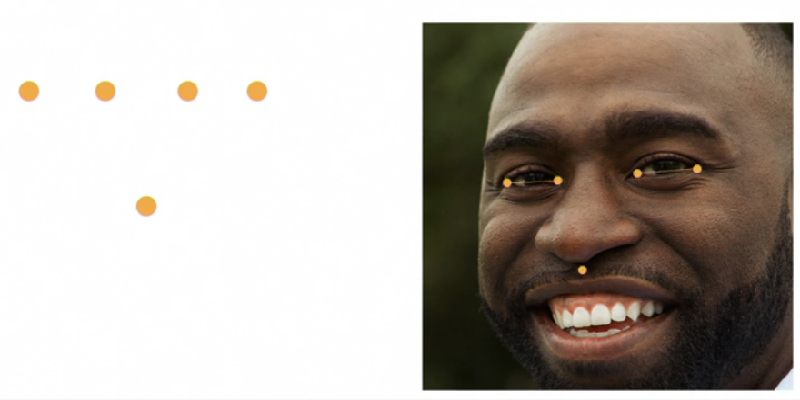

In [10]:
Image.open('Images/five_point.png').resize((800, 400))

The main use for face landmark estimation is called __face alignment__ where we correct for head rotation when doing face recognition. We'll use it later in this course in our face recognition pipeline. 

## Identifying Face Landmarks with a Machine Learning Model

1. __Overlay the entire face template on the face__
   - First, we'll assume that all human faces are roughly the same shape. Because of this assumption, all faces must be pretty close to our default face. So instead of trying to match up each point one at a time, we'll just overlay the entire face template on the face and then we'll only ask the computer to move and adjust the template so that each point is closer to the right point. 
   
   
2. __Add the constraint of how much the computer can move each point__
    - The next trick is that we'll add the constraint of how much the computer can move each point. The rule is that no single point can be moved too far from its neighboring points. Let's move these points into place. Notice that they all move a little but no point moves too far from its neighbor points. This constraint keeps the computer from coming up with face landmarks that are totally wrong. It makes the job easier for the computer since it doesn't have to learn how to find each point one of the time. It just has to learn how to push the points in the right direction. 
    
    
3. __Train several different machine learning models that each do part of the job__
    - The third trick we'll use is to split the job of completely fitting the face template into the face into smaller problems. In other words, we'll train several different machine learning models that each do part of the job. The first model is allowed to move the points a good bit but it doesn't have to get everything perfect. It just has to improve the fit over the starting point. 
    
    
4. __Then we'll train the second model, that takes the result of this, and tries to fine tune each point to get them a little bit closer to the right place. It will be allowed to move each point less than the first model. That's better.__
    - The second model only has to learn how to fix the mistakes of the first model. It doesn't have to learn the complex task of identifying face landmarks from scratch. This makes its job easier. 
    
This process of feeding one model's results into another model for fine tuning continues as many as 10 times. The end result of all 10 models working together is that the points end up in exactly the right place but each model only had to be able to do one small job. And once this cascade to face landmark model is trained, it should work for pretty much any face.

### Automatic Face Landmark Estimation
- The same face landmark estimation model should work for any face
- However, models don't transfer to other domains. A model trained on human faces won't work on cartoons

## Posing Faces Based on Face Landmarks

### Face Alignment
- Adjusting a raw face image so that key facial features (like the eyes, nose, and mouth) line up with a predefined template

### Why do we need to align face images?
We want our face recognition system to work even if the person isn't looking directly into the camera. When we take pictures in the real world, a person's head will usually be rotated and not looking directly at the camera. 

#### Issue
If we don't correct for this head rotation, it will be harder for our face recognition system to recognize people correctly. The system will have to understand that the same face rotated in different ways is the same person. 

#### Correcting the rotation
By correcting for head rotation, our face recognition system will have to do a little less work to recognize people and thus will be more accurate overall. 

### Step 1: Detect Face Landmarks
1. Detect Face Landmarks
    -  In this example, we've detected five key points: the sides of each eye and the center point under the nose. Now that we know where the eyes and nose are, we need to figure out how to adjust the image so that the points in our image line up with the template on the right. 

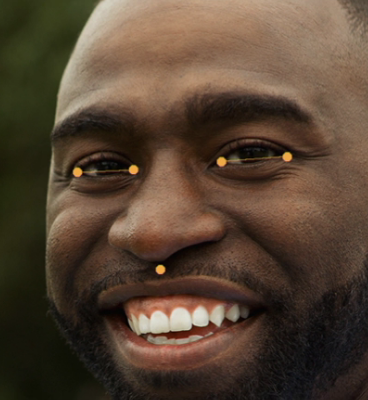

In [11]:
Image.open('Images/step_one.png')

### Step 2: Calculate Affine Transform
1. Figure out how to adjust the image so that the points in our image line up with the template on the right. But we don't want to distort the image too much because it would change the look of the face and throw off the face recognition system's accuracy. One simple solution is to calculate what's called an __affine transformation__

__Affine Transformation__
- An affine transformation is a linear mapping between set of points where parallel lines remain parallel 
- Basically, this means that we can move, rotate, and stretch our image, but we can't do more complex things like twisting or warping the image

### Calculating Affine Transformation
-  To calculate the affine transformation, we look at the position of the points on the left and figure out what amount of stretching and rotation would get them closest to the points on the right. Then we just apply that same math to the pixels in our image. 
- When we are writing the code in our face recognition system, we won't have to write any code to do this face alignment. 

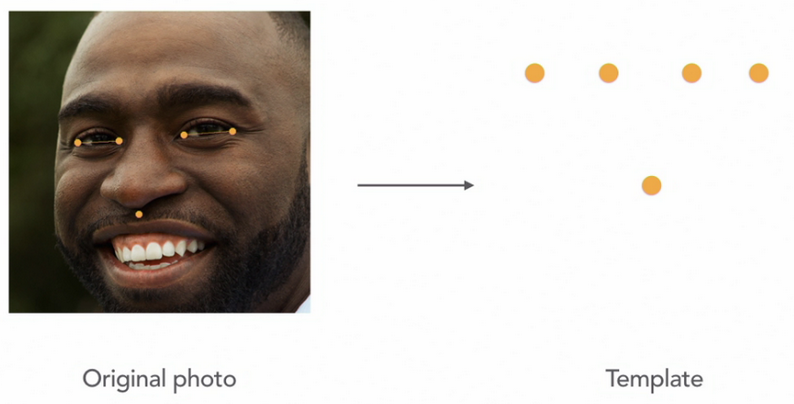

In [12]:
Image.open('Images/step_two.png')

### Face Landmark Code

Write the code to detect individual landmarks in each face in an image

In [13]:
### Load libraries
import PIL.Image
import PIL.ImageDraw
import face_recognition

In [14]:
# Load the image into a numpy array
image = face_recognition.load_image_file('Images/people.jpg')
image_hs = face_recognition.load_image_file('Images/headshot.jpg')

# Find all facial features in all of the faces in the image using face_landmarks() that will output 
#  a list that contains entry for each face found in the image
face_landmarks_list = face_recognition.face_landmarks(image) # pass in the array with the image data
face_landmarks_list_hs = face_recognition.face_landmarks(image_hs) # pass in the array with the image data

# Number of faces found
number_of_faces = len(face_landmarks_list)
print('Found {} face(s) in this photograph.'.format(number_of_faces))

# Load the image into a PIL object so that we can draw on top of it
pil_image = PIL.Image.fromarray(image)
pil_image_hs = PIL.Image.fromarray(image_hs)

# Create a PIL drawing object that will be able to draw lines later
draw = PIL.ImageDraw.Draw(pil_image)
draw_hs = PIL.ImageDraw.Draw(pil_image_hs)

# Face list
face_list = [face_landmarks_list, face_landmarks_list_hs]

# PIL list
pil_list = [pil_image, pil_image_hs]

# Draw list
draw_list = [draw, draw_hs]

# Loop over each image
for image in face_list:
    
    # Loop over each face
    for face_landmarks in image:

        # Loop over each facial feature (eyes, nose, mouth, lips, etc.)
        for name, list_of_points in face_landmarks.items():

            # Print the location of each facial feature in the image
            #print("The {} in this face has the following points: {}".format(name, list_of_points))

            # Trace out each facial feature in the image
            draw.line(list_of_points, fill='red', width=2)

    pil_image.show()        

Found 6 face(s) in this photograph.


# TODO: Looping ^

We'll call face_recognition.face_landmarks then we'll pass in the array with the image data, which we called image. 

Then we'll capture the result as a variable. Well call it face_landmarks_list equals that function call. 
- The result of the function is a list that contains entry for each face found in the image. If no faces were found in the image, the list will be empty. Otherwise, there will be one set of face landmarks for each face that was in the image. 

Each face will be a Python dictionary object. It's similar to a hashmap or a hashtable in other programming languages. The keys of the dictionary are the names of the facial feature. Things like left eye, right eye, chin, and so on. 
- The values for each key are the list of X,Y coordinates of the points that correspond to that facial feature. For example, each eye is a list of six points that trace a line from one end of the eye to another.

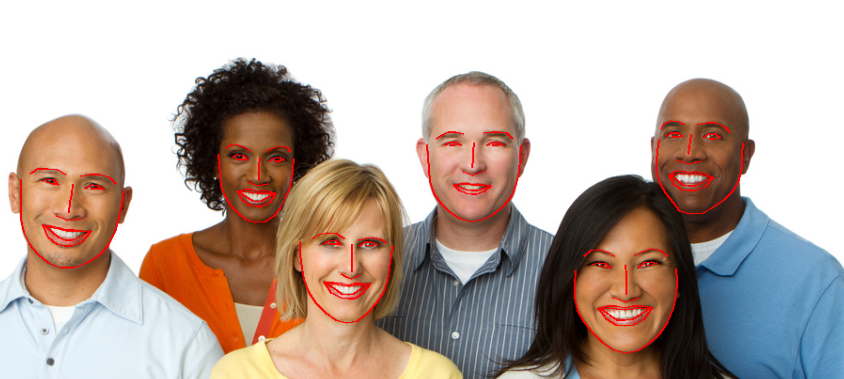

In [15]:
Image.open('Images/facial_detection.png')

In [16]:
# Load the image into a numpy array
image = face_recognition.load_image_file('Images/headshot.jpg')

# Find all facial features in all of the faces in the image using face_landmarks() that will output 
#  a list that contains entry for each face found in the image
face_landmarks_list = face_recognition.face_landmarks(image) # pass in the array with the image data

# Number of faces found
number_of_faces = len(face_landmarks_list)
print('Found {} face(s) in this photograph.'.format(number_of_faces))

# Load the image into a PIL object so that we can draw on top of it
pil_image = PIL.Image.fromarray(image)

# Create a PIL drawing object that will be able to draw lines later
draw = PIL.ImageDraw.Draw(pil_image)

# Loop over each face
for face_landmarks in face_landmarks_list:
    
    # Loop over each facial feature (eyes, nose, mouth, lips, etc.)
    for name, list_of_points in face_landmarks.items():
        
        # Print the location of each facial feature in the image
        print("The {} in this face has the following points: {}".format(name, list_of_points))
        
        # Trace out each facial feature in the image
        draw.line(list_of_points, fill='red', width=2)

pil_image.show() 

Found 1 face(s) in this photograph.
The chin in this face has the following points: [(168, 175), (168, 197), (171, 221), (176, 244), (186, 266), (202, 285), (221, 300), (242, 312), (264, 314), (284, 310), (300, 296), (312, 279), (324, 260), (332, 239), (335, 219), (336, 197), (334, 177)]
The left_eyebrow in this face has the following points: [(186, 148), (197, 133), (214, 127), (232, 130), (247, 139)]
The right_eyebrow in this face has the following points: [(271, 140), (284, 132), (300, 131), (315, 138), (323, 151)]
The nose_bridge in this face has the following points: [(262, 157), (263, 168), (265, 179), (267, 192)]
The nose_tip in this face has the following points: [(245, 210), (255, 211), (264, 213), (273, 211), (282, 210)]
The left_eye in this face has the following points: [(206, 163), (215, 159), (226, 159), (235, 165), (226, 165), (215, 165)]
The right_eye in this face has the following points: [(283, 166), (292, 162), (302, 163), (310, 168), (302, 169), (292, 168)]
The top_

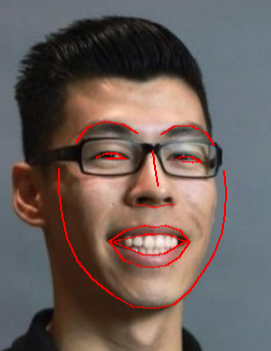

In [17]:
Image.open('Images/facial_detection_hs.png')

## Face Encodings
Process of taking an image of a face and turning it into a set of measurements

So far, our face recognition pipeline can find faces in an image, extract them, identify face landmarks, and then align the faces. Now we're ready to dive into the most important step in our face recognition pipeline: telling faces apart from each other (Representing a Face as a Set of Measurements)

### Telling faces apart from each other

We want to figure out which known face is the best match for our unknown face. The simplest approach would be to compare the unknown face with each of our known face images.

Whichever image has the most pixels in common must be the best match. However, this simplistic approach has two big problems. First, if we have lots of known faces directly comparing every pair of images would be too slow. Second, just comparing the images themselves isn't really the same as comparing the structure of each person's face.

#### Solution
The solution is to come up with a way to measure each face. 

For example, we might want to measure the width of each eye, the size of the cheekbones, and the width of the mouth, and so on. Then, if we want to compare two faces to see if they match, all we need to do is see if they have similar measurements. If the measurements of two faces are close enough, we can assume they are the same person. 

This is a better approach than comparing images directly because it takes the structure of the face into account. Also, it is much quicker to compare a few measurements than it is to compare an entire image with thousands of pixels.

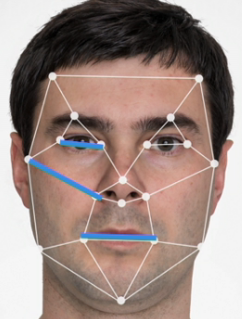

In [18]:
# Measurements in blue
Image.open('Images/measure_one.png')

### Use the comparison image below

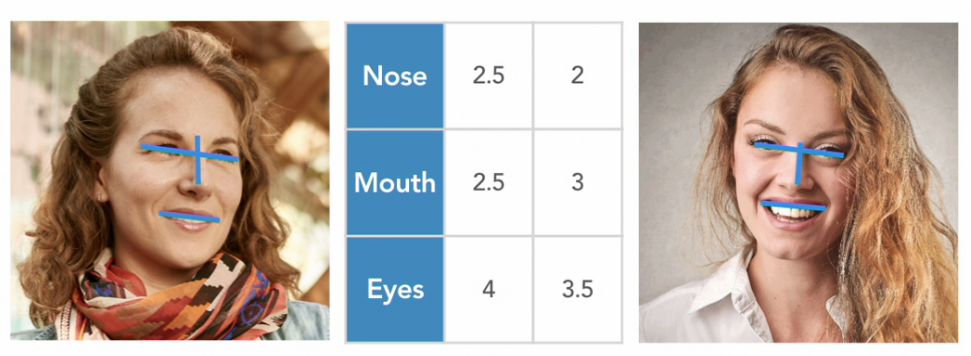

In [19]:
Image.open('Images/measure_compare.png')

Here are two faces, let's take three measurements for each face. 
1. First, the length of the nose. We'll say 2.5 on the left and 2 on the right. 
2. Next, the width of the mouth. Let's say 2.5 on the left and 3 on the right. 
3. And finally the distance from one eye to the other. 

Let's call that 4 on the left and 3.5 on the right. We can pretend that the three measurements we captured from each face are coordinates that identify a point in space. The three measurements from the first face were 2.5, 2.5, and 4 shown here as a point in blue. And the measurements from the second face mean that the face appears at point 2, 3, 3.5 shown here in orange.

The process of taking a picture of a face and turning it into a set of measurements is called face encoding. We're taking a complex image and reducing it down to a point in space.

### Building the real face recognition system

- The real face recognition system we build will be based on this basic idea of encoding a face as a point in space (typically 128 or more)
- Instead of trying to decide on 128 ways to measure a face, we'll use machine learning to create those measurements

### Deep Metric Learning
Using deep learning to have a computer come up with a way to measure something that you don't know how to measure yourself

### Why use machine learning?
It turns out that computers can do a better job of deciding what to measure than we can. Instead of trying to come up with a set of measurements to represent each face, we'll use a deep convolutional neural network to come up with its own set of facial measurements instead. We'll use an approach called deep metric learning. 

### DML Process
1. You show it lots of examples of things that are the same and things that are different, and it figures out how to create measurements that tell them apart

Here are three pictures labeled A, B, and C. 

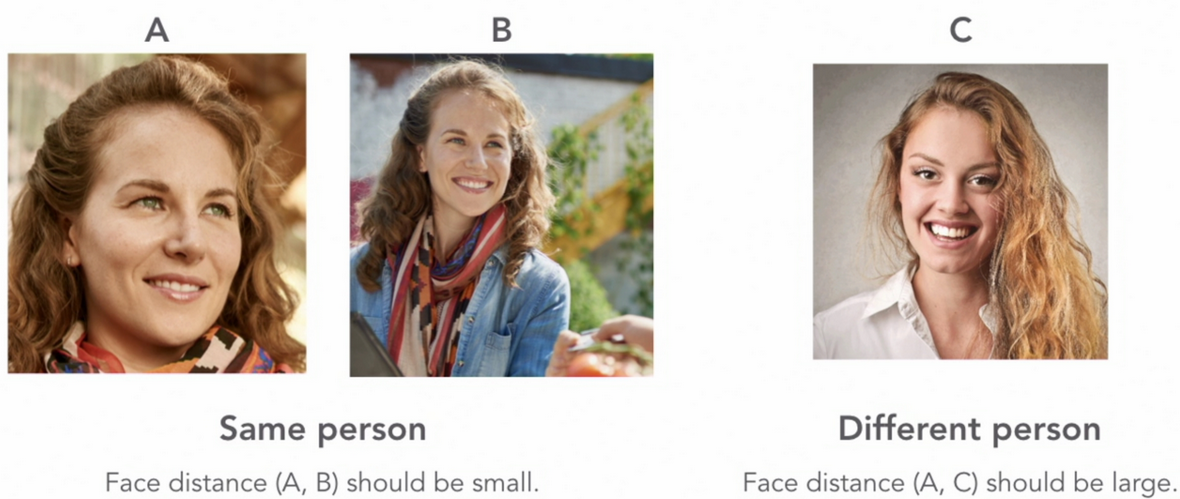

In [20]:
Image.open('Images/triplets.png')

Pictures A and B on the left show the same person. Picture C on the right is a different person than the first two. 

We want the face distance between the first two pictures to be very small because it's the same person. We also want picture C to have a large face distance from picture A because it's a different person. We can use this idea to set up a machine learning algorithm. We'll feed millions of photos into a neural network in groups of three like this. 

### Triplets
These groups of three are called __triplets__. Each triplet will have two pictures of the same person and one picture of a different person. The machine learning algorithm's job is to figure out how to represent each picture as a set of 128 measurements, where the third person's measurements are far apart from the others, while keeping the first two pictures' measurements close together. Each time the algorithm sees a triplet, it tweaks the face measurements it is generating a little bit to get closer to that goal. By repeating this process millions and millions of times with millions of pictures, the machine learning algorithm eventually learns how to generate a set of face measurements where two pictures of the same person have almost the same measurements, and two pictures of different people have very different measurements. 

### Face Encoding Model

The model we trained is called a face encoding model because it is capable of encoding a picture as a set of measurements. 

After the face encoding model is trained, we can feed in a picture of any person, and the model should be able to generate a set of 128 numbers that represent that face. If we feed in another picture of the same person we should get back approximately the same numbers. Because a trained model should work for any picture of any person, that means that we only have to train the face encoding model once. 

As long as we train it on a wide variety of photographs representing millions of people, the model should work well for any person. This is great news, because training a new face encoding model requires millions of photographs and takes a long time, even using a computer with a high end GPU. 

### Pre-Trained Model

We'll be using a pre-trained model instead of training one from scratch. In most cases, this will work fine and you won't ever need to retrain your own face encoding model. 

### Problem of Interpretability - What do the face measurements mean?
So this brings up a great question. What do the 128 measurements generated by the face encoding model actually mean? Did it decide to measure the length of the person's nose or the size of the person's eyes? It turns out that we have no idea. All that we care is that the model generates nearly the same numbers when looking at two pictures of the same person. But the fact that we can't understand how the model is measuring each face is called the problem of interpretability. We can't interpret exactly how the model came up with its answers because the process it came up with will be too mathematically complex for us to understand. 

### Hidden Bias
The problem of interpretability exists with many different kinds of machine learning models, and because we don't understand exactly how the model is working, the model can have hidden biases that aren't easy to see. In the face recognition model, there's often a hidden bias where the model will be more accurate for people from one region of the world than another. This is because the training data used to train the model is unintentionally weighted towards photos of people from one region of the world. Make sure you keep this in mind when you are building face recognition systems. They don't perform equally well for all people, and they have their own hidden biases. 

### Unfair Representation
Just because they're using a computer algorithm doesn't mean that they are fair. Instead, they are just a reflection of the data that they were trained on, and data sets are almost never fair representations of the real world. 

### Write the code to generate face encoding for an image

In [21]:
import face_recognition

# Load the jpg files into numpy arrays
image = face_recognition.load_image_file("Images/person.jpg")

# Generate the face encodings
face_encodings = face_recognition.face_encodings(image) # pass in an image array

''' 
The result of the function is an array. Each element in the array represents one face that was found in the image. 
The entry for each face contains another array with a 128 elements. 
Those 128 values are the face encoding that represent this unique face.
'''

# PIL Image (converts array to picture)
pil_image = PIL.Image.fromarray(image)

if len(face_encodings) == 0:
    # No faces found in the image.
    print("No faces were found.")

else:
    # Grab the first face encoding
    first_face_encoding = face_encodings[0] # get first element from the array

    # Print the results
    print(first_face_encoding)
    
    # Open
    pil_image.show()

[-0.20855851  0.01845224  0.05200066 -0.01912927 -0.02748835 -0.01855115
 -0.02725497 -0.0184503   0.19835585 -0.0112457   0.19645664  0.0160067
 -0.15621796 -0.08862408 -0.00915148  0.11604425 -0.12597211 -0.14229296
 -0.03572806 -0.03505833  0.03726118  0.03980888 -0.07782647  0.07926027
 -0.14744228 -0.3470616  -0.10856146 -0.12216781  0.01723715 -0.11650665
  0.06511284 -0.03900211 -0.18297049 -0.10930697  0.06847559  0.12637652
 -0.05037969 -0.09572248  0.13429841 -0.00703449 -0.16005872 -0.05573067
  0.08435321  0.27441847  0.13435344  0.08523722  0.00496128 -0.11246416
  0.16313235 -0.27373844  0.08402453  0.10128954  0.15344827  0.10832103
  0.11609219 -0.09201843  0.07474768  0.25488392 -0.30816695  0.10207553
  0.00198595 -0.01495537  0.03411685 -0.02620055  0.21705674  0.14441346
 -0.11093327 -0.12751678  0.17208101 -0.16183111 -0.04968163  0.12839435
 -0.03207506 -0.26411176 -0.31615111  0.07128874  0.36263996  0.18028149
 -0.13117105 -0.01013261 -0.05811106 -0.00737814  0.

There are 128 values that try to uniquely represent this face. Another picture of this same person should give us values that are very close to but not exactly the same as these values. A picture of a different person should give us values that are not close at all.

### No Faces - Keep in Mind
With the size of zero, that means no faces were detected in the image. This can happen for several reasons. First, if there are no faces in the image at all then no results will be returned. Second, sometimes it can't find any faces in the image even when there are faces there. The two most common reasons are due to the faces too small to detect or there's something wrong with the image data itself. 

### How to use measurements to represent a face?
Using our face encoding model we can feed in the picture of a face and get back 128 measurements to represent that face. So how can we use those measurements to identify people? We'll do that using Euclidean distance. Euclidean distance is just the distance between two points in space along a straight line. It can be hard to visualize a model with 128 measurements. 

### Euclidean Distance
The distance between two points in space along a straight line

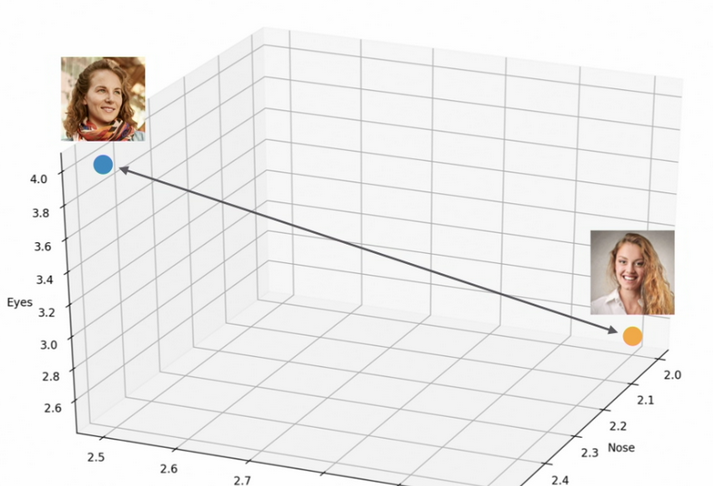

In [22]:
Image.open('Images/euclidean_distance.png')

### 3D Space
Now we can visualize those sets of measurements as two points in 3D space. The face on the left is at 2.5, 2.5, 4, shown here as a point in blue, and the face on the right is at 2, 3, 3.5, shown here in orange. To measure the distance between them, we'll draw a straight line between those points and measure the length of that line. This line is the Euclidean distance between those two faces. To check if two faces match or not, we'll check the distance we calculated against a threshold or cutoff value. 

### Setting a Face Distance Threshold
Let's set the threshold at 0.6 (face maximum distance that is still considered the same face), and this threshold value is set when you train the face-encoding model. The model we'll be using in our code was trained with a 0.6 threshold, so we'll use that same number in these examples. 

We'll say that if the distance between faces is over 0.6, the faces are too far apart to be the same person. That if they're under the threshold, we'll say that they match and the lower the distance, the better the match. Here' the formula for calculating Euclidean distance between two points. 
1. First, we'll substitute in our two points. __(See picture below)__ We'll substitute 2.5, 2.5, and four as the values for A, and two, three, 3.5 as the values for B. 
2. Now we'll just do the calculations. And we'll see that the result is the square root of 0.75. If we do that calculation, that works out to about 0.866. That's the distance between the two faces. And since 0.866 is over our 0.6 threshold, we'll say that those two faces are not a match. 

In our real face recognition system, we'll be capturing 128 measurements for each face instead of only three. Because of that, the Euclidean distance formula is longer than it was for three points, but the only difference is that we need to add extra terms for each dimension. So the final formula will have 128 squared terms under the square root instead of just three.

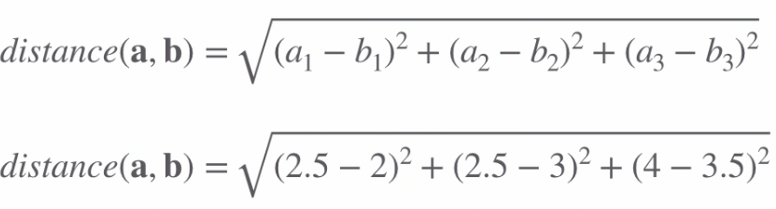

In [23]:
Image.open('Images/eu_dist_formula.png')

### Result
distance(a, b) = sqrt(0.75) ~ 0.866 (distance between the two faces)

Not a match since 0.866 > 0.60

### Benefits of Euclidean Distance for Face Matches
Using Euclidean distance to check for face matches has a lot of nice properties. 

1. Fast to calculate and easy to parallelize
    - First, calculating Euclidean distance is fast, so it's easy to compare an unknown face against a large set of known faces quickly. If you're familiar with __vector calculus__, you might notice that calculating Euclidean distance is basically the same math as calculating a vector's norm. This is an operation that can be parallelized easily by modern CPUs so the calculation runs very quickly. 


2. Works nicely with other common ML algorithms (KNN)
    - Second, lots of other machine learning algorithms already work well with data that represents points in space separated by a distance. For example, the k-neaest neighbors, or KNN, algorithm, is a common machine learning algorithm that is used to identify clusters of similar points. Because each face is just a point in space, we can easily apply algorithms like this to face data.


3. Makes it easy to store and query face measurements in a database
    - Third, it's easy to store a list of points in the database. That means that, if we wanna work with large sets of faces, we can store our face-encodings in a database and quickly search them, and even calculate face distances, using the database's math operations. The database doesn't even have to know anything about deep learning. 

### Coding a real face recognition system

You can feel free to try this out with your own photos. But for pictures of known people, you wanna make sure that:
1. There's only one person in the picture
2. They are facing the camera
3. Clearly visible
4. That there's reasonably good lighting. 

If you use lower-quality images, the results won't be as accurate. 

In [24]:
import face_recognition

# Load the known images (each image is loaded into an array)
image_of_person_1 = face_recognition.load_image_file("Images/person_1.jpg")
image_of_person_2 = face_recognition.load_image_file("Images/person_2.jpg")
image_of_person_3 = face_recognition.load_image_file("Images/person_3.jpg")

''' 
On the end here, just put zero in brackets to get the first result from the array. But if you do this, make 
sure your images only contain one person each. Otherwise you won't know which face you're grabbing. 
'''

# Get the face encoding of each person. This can fail if no one is found in the photo.
person_1_face_encoding = face_recognition.face_encodings(image_of_person_1)[0] # pass in the image array
person_2_face_encoding = face_recognition.face_encodings(image_of_person_2)[0]
person_3_face_encoding = face_recognition.face_encodings(image_of_person_3)[0]

'''
Since we know these images only contain one face, we can go ahead and grab just the first result of the 
function by accessing index zero.
'''

# Create a list of all known face encodings (put all three face encodings in an array)
known_face_encodings = [
    person_1_face_encoding,
    person_2_face_encoding,
    person_3_face_encoding
]

# Load the image we want to check
unknown_image = face_recognition.load_image_file("Images/unknown_8.jpg")

# Get face encodings for any people in the picture
unknown_face_encodings = face_recognition.face_encodings(unknown_image)

# There might be more than one person in the photo, so we need to loop over each face we found
for unknown_face_encoding in unknown_face_encodings:

    # Test if this unknown face encoding matches any of the three people we know (compare_faces() function)
    results = face_recognition.compare_faces(known_face_encodings, unknown_face_encoding, tolerance=0.6)

    name = "Unknown"

    if results[0]:
        name = "Person 1"
    elif results[1]:
        name = "Person 2"
    elif results[2]:
        name = "Person 3"

    print(f"Found {name} in the photo!")


Found Person 3 in the photo!


### Face Recognition Model in a Different Scenario

Completed face recognition system and those have recognized three people from three different images, listed here.

In [25]:
import face_recognition

# Load the known images
image_of_person_1 = face_recognition.load_image_file("Images/person_1.jpg")
image_of_person_2 = face_recognition.load_image_file("Images/person_2.jpg")
image_of_person_3 = face_recognition.load_image_file("Images/person_3.jpg")

# Get the face encoding of each person. This can fail if no one is found in the photo.
person_1_face_encoding = face_recognition.face_encodings(image_of_person_1)[0]
person_2_face_encoding = face_recognition.face_encodings(image_of_person_2)[0]
person_3_face_encoding = face_recognition.face_encodings(image_of_person_3)[0]

# Create a list of all known face encodings
known_face_encodings = [
    person_1_face_encoding,
    person_2_face_encoding,
    person_3_face_encoding
]

# Load the image we want to check
# unknown_image = face_recognition.load_image_file("Images/unknown_7.jpg")
unknown_image = face_recognition.load_image_file("Images/group.jpg")

# Get face encodings for any people in the picture
face_locations = face_recognition.face_locations(unknown_image, number_of_times_to_upsample=2) # scale image 2x
unknown_face_encodings = face_recognition.face_encodings(unknown_image, known_face_locations=face_locations)

'''
We can also split this out into two separate steps so that we have more control over how it works. 
We can pass these face locations into the next function using a special known face locations parameter. 

Now that we have the code for face locations as a separate step, we can customize how it works. The main 
reason we couldn't find the face in the image is because the face was too small. To over come that, we can 
enlarge the image before we look for faces in it. To do that, we'll go to the face locations function 
and here for number_of_times_to_upsample will pass in two. 
'''

# There might be more than one person in the photo, so we need to loop over each face we found
for unknown_face_encoding in unknown_face_encodings:

    # Test if this unknown face encoding matches any of the three people we know
    results = face_recognition.compare_faces(known_face_encodings, unknown_face_encoding, tolerance=0.6)

    name = "Unknown"

    if results[0]:
        name = "Person 1"
    elif results[1]:
        name = "Person 2"
    elif results[2]:
        name = "Person 3"

    print(f"Found {name} in the photo!")


Found Person 3 in the photo!
Found Person 2 in the photo!
Found Person 1 in the photo!


Remember that face recognition is the multi-step pipeline. 

First we have to find each face, then we have to find the facial features and align each face, and then we can generate facing encodings for each face. If any step in that pipeline fails, the result of the system won't work. In this case, our system isn't even detecting the face because it's too small for the default settings. Since the face is never detected, the system can't identify it. Let's close these results.

### Scaling 
With face recognition, the trade off is usually between speed and accuracy. Scaling up the image is a lot slower and uses a lot more memory, but now it finds faces that were otherwise missed. Depending on the application that you're building, you might care more about speed. For example, if you know the person will be looking directly into the camera, you can assume their face will be large enough in the image that you won't need to upsample the image at all, this will make your code run faster. 

### Building a system tip
When building a face recognition system, you'll want to play around with the upscaling settings to get the best results without making your code run too slowly. So, definitely keep this tip step in mind. 

## Fun Uses of Face Recognition

We'll have our program draw makeup on each of these people. How about we draw purple lipstick on each persons lips and maybe highlight their eyebrows. 

In [26]:
from PIL import Image, ImageDraw
import face_recognition

# Load the jpg file into a numpy array
image = face_recognition.load_image_file("Images/people.jpg")
image = face_recognition.load_image_file("Images/group.jpg")
image = face_recognition.load_image_file("Images/cropped.png")

# Find all facial features in all the faces in the image
face_landmarks_list = face_recognition.face_landmarks(image) # dictionary

'''
 Each entry will be a Python dictionary or hash table that 
 contains all the points that correspond to each major facial feature.
'''

# Load the image into a Python Image Library object so that we can draw on top of it and display it
pil_image = Image.fromarray(image)

# Create a PIL drawing object to be able to draw lines later
d = ImageDraw.Draw(pil_image, 'RGBA')

'''
 This will give us access to drawing tools that we'll use to trace out the face landmarks on each 
 face. Notice that I also passed an RGBA as an option when creating the image draw object. 
 That tells PIL that we wanna treat our drawing as a four-channel image. We'll have the normal 
 three-channels for red, green and blue, but we'll also have an extra channel that controls image 
 transparency so it will let us draw on top of the image using semi-transparent colors which will 
 look a little nicer than using solid colors. 
'''

# Loop through each face in our image and give us all the face landmarks for that face
for face_landmarks in face_landmarks_list:
    # The face landmark detection model returns these features:
    #  - chin, left_eyebrow, right_eyebrow, nose_bridge, nose_tip, left_eye, right_eye, top_lip, bottom_lip

    # Draw a line over the eyebrows
    d.line(face_landmarks['left_eyebrow'], fill=(128, 0, 128, 100), width=3) # pass in the key name
    d.line(face_landmarks['right_eyebrow'], fill=(128, 0, 128, 100), width=3)

    # Draw over the lips
    d.polygon(face_landmarks['top_lip'], fill=(128, 0, 128, 100))
    d.polygon(face_landmarks['bottom_lip'], fill=(128, 0, 128, 100))

# Show the final image
pil_image.show()


## Finding lookalikes with face recognition

In [27]:
import face_recognition
from pathlib import Path
from PIL import Image

# Load the image of the person we want to find similar people for
known_image = face_recognition.load_image_file("Images/cropped.png")

# Encode the known image
known_image_encoding = face_recognition.face_encodings(known_image)[0]

# Variables to keep track of the most similar face match we've found
best_face_distance = 1.0
best_face_image = None

# Loop over all the images we want to check for similar people
for image_path in Path("Images/people").glob("*.png"):
    # Load an image to check
    unknown_image = face_recognition.load_image_file(image_path)

    # Get the location of faces and face encodings for the current image
    face_encodings = face_recognition.face_encodings(unknown_image)

    # Get the face distance between the known person and all the faces in this image
    face_distance = face_recognition.face_distance(face_encodings, known_image_encoding)[0]
    
    '''
     The result of this function is a list. Each item in the list represents the distance 
     between our known image and one of the unknown images. The results are in the same order 
     as the "face_encodings" that we passed in. But since we know that each of our images in 
     the "people" folder only has one face, I'll just grab the first "face_distance" result 
     by passing in array index zero.
    '''

    # If this face is more similar to our known image than we've seen so far, save it
    if face_distance < best_face_distance:
        # Save the new best face distance
        best_face_distance = face_distance
        # Extract a copy of the actual face image itself so we can display it
        best_face_image = unknown_image

# Display the face image that we found to be the best match!
pil_image = Image.fromarray(best_face_image)
pil_image.show()


### Search this image

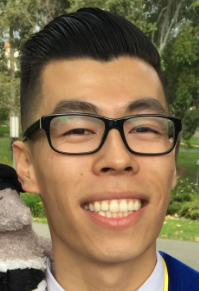

In [28]:
Image.open('Images/cropped.png')

### Result

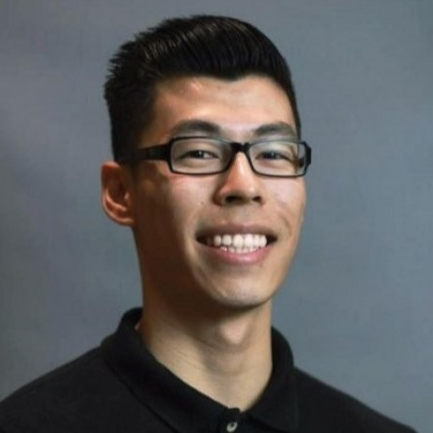

In [29]:
Image.open('Images/people/headshot2.png')